In [2]:
#Import the libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

## Download and Unzip the dataset.

In [3]:
# url_to_the_zip_file = "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/34330/3265183/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1647437599&Signature=qVPxXAvAiFlZLpO%2Fp287NXm%2FlUOymBxRMs7NJKMGXlm3afW9PV9LuNalMJS56E%2BjsMSHh46ouLS6gNHYbyPwmdLSQiPpLQPGU6NTKTNprbDUOgYb2rqC4w6AgLOpdRh%2FGdabYAVAdjIh24Teoj5k%2Bs%2Fybm00sxAGf358%2BcxjEonvvUJDEhK7GTtv9NAFxAfsO%2F69xOWSkLEhjjnCwQ3QzfXWxbuYVnqlwy0dwQ6S%2F8iQappRaQg2%2BF9j76t1ay0B3Kg3ANj0P5EuVMDL2KVld3cQLiM7DPi9vQQV531T8snYsbiHjoE%2BhkH6w%2BWeULvu5UpDSaiVRepgtoscjgM8ig%3D%3D&response-content-disposition=attachment%3B+filename%3D2110446-data-science-and-data-engineering-2022.zip"
# new_file_name = "2110446-data-science-and-data-engineering-2022.zip"

# !rm -f "$new_file_name"
# !wget -c "$url_to_the_zip_file" -O "$new_file_name"
# !unzip "$new_file_name"

## read_csv()

In [4]:
def toDF(pm25_filename, temp_filename, wind_filename):
  pm25_df = pd.read_csv('datasci_dataset_2022/'+pm25_filename, names=['Time', 'PM25'], skiprows=1)
  pm25_df['Time'] = pd.to_datetime(pm25_df['Time'])
  # pm25_df['Time'] = pm25_df['Time'].dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok')
  # pm25_df['Time'] = pm25_df['Time'].dt.tz_localize(None)
  pm25_df.set_index('Time', inplace=True)
  pm25_df.columns = ['PM25']
  pm25_df = pm25_df[~pm25_df.index.duplicated(keep='first')]
  pm25_df.interpolate(inplace=True)
  pm25_df.index = pd.DatetimeIndex(pm25_df.index)

  temp_df = pd.read_csv('datasci_dataset_2022/'+temp_filename, names=['Time', 'Temp'], skiprows=1)
  temp_df['Time'] = pd.to_datetime(temp_df['Time'])
  temp_df.set_index(temp_df['Time'], inplace=True)
  temp_df.drop(columns={'Time'}, inplace=True)
  temp_df.columns = ['Temp']
  # pad() is similar to fillna() with forward filling
  temp_df = temp_df.resample('h').pad()
  # temp_df.index = pd.DatetimeIndex(temp_df.index)

  wind_df = pd.read_csv('datasci_dataset_2022/'+wind_filename, names=['Time', 'WindSpeed', 'WindDir'], skiprows=1)
  wind_df['Time'] = pd.to_datetime(wind_df['Time'])
  wind_df.set_index(wind_df['Time'], inplace=True)
  wind_df.drop(columns={'Time'}, inplace=True)
  wind_df.columns = ['WindSpeed', 'WindDir']
  # backward filling
  wind_df = wind_df.resample('h').bfill()
  # wind_df.index = pd.DatetimeIndex(wind_df.index)

  pm25_df['copy_index'] = pm25_df.index
  df = pd.merge(pm25_df, temp_df, left_index=True, right_index=True)
  df = pd.merge(df, wind_df, left_index=True, right_index=True)

  df = df[['Temp','WindSpeed','WindDir','PM25']]
  
  # padding first and last indices
  # df = df.ffill()
  # df = df.bfill()

  return df

In [5]:
def toDFtest(pm25_filename, temp_filename, wind_filename):
  pm25_df = pd.read_csv('datasci_dataset_2022/'+pm25_filename, names=['Time', 'PM25'], skiprows=1)
  pm25_df['Time'] = pd.to_datetime(pm25_df['Time'])
  pm25_df.set_index('Time', inplace=True)
  pm25_df.columns = ['PM25']
  pm25_df = pm25_df[~pm25_df.index.duplicated(keep='first')]
  pm25_df.index = pd.DatetimeIndex(pm25_df.index)

  temp_df = pd.read_csv('datasci_dataset_2022/'+temp_filename, names=['Time', 'Temp'], skiprows=1)
  temp_df['Time'] = pd.to_datetime(temp_df['Time'])
  temp_df.set_index(temp_df['Time'], inplace=True)
  temp_df.drop(columns={'Time'}, inplace=True)
  temp_df.columns = ['Temp']
  temp_df = temp_df.resample('h').bfill()

  wind_df = pd.read_csv('datasci_dataset_2022/'+wind_filename, names=['Time', 'WindSpeed', 'WindDir'], skiprows=1)
  wind_df['Time'] = pd.to_datetime(wind_df['Time'])
  wind_df.set_index(wind_df['Time'], inplace=True)
  wind_df.drop(columns={'Time'}, inplace=True)
  wind_df.columns = ['WindSpeed', 'WindDir']
  # backward filling
  wind_df = wind_df.resample('h').bfill()
  # wind_df.index = pd.DatetimeIndex(wind_df.index)

  pm25_df['copy_index'] = pm25_df.index
  df = pd.merge(pm25_df, temp_df, left_index=True, right_index=True)
  df = pd.merge(df, wind_df, left_index=True, right_index=True)

  df = df[['Temp','WindSpeed','WindDir','PM25']]

  return df

In [6]:
bkk_train = toDF('BKK/train/bkk_train.csv', 'BKK/train/bkk_temp_surface.csv', 'BKK/train/bkk_weather_wind.csv')
bkk_test = toDF('BKK/test/bkk_test.csv', 'BKK/test/bkk_temp_test.csv', 'BKK/test/bkk_wind_test.csv')

cnx_train = toDF('Chiangmai/train/chiangmai_train.csv', 'Chiangmai/train/chiangmai_temp_surface.csv', 'Chiangmai/train/chiangmai_weather_wind.csv')
cnx_test = toDF('Chiangmai/test/chiangmai_test.csv', 'Chiangmai/test/chiangmai_temp_test.csv', 'Chiangmai/test/chiangmai_wind_test.csv')

kkc_train = toDF('Khonkaen/train/khonkhan_train.csv', 'Khonkaen/train/khonkaen_temp_surface.csv', 'Khonkaen/train/khonkaen_weather_wind.csv')
kkc_test = toDF('Khonkaen/test/khonkhan_test.csv', 'Khonkaen/test/khonkaen_temp_test.csv', 'Khonkaen/test/khonkaen_wind_test.csv')

rayong_train = toDF('Rayong/train/rayong_train.csv', 'Rayong/train/rayong_temp_surface.csv', 'Rayong/train/rayong_weather_wind.csv')
rayong_test = toDF('Rayong/test/rayong_test.csv', 'Rayong/test/rayong_temp_test.csv', 'Rayong/test/rayong_wind_test.csv')

saraburi_train = toDF('Saraburi/train/saraburi_train.csv', 'Saraburi/train/saraburi_temp_surface.csv', 'Saraburi/train/saraburi_weather_wind.csv')
saraburi_test = toDF('Saraburi/test/saraburi_test.csv', 'Saraburi/test/saraburi_temp_test.csv', 'Saraburi/test/saraburi_wind_test.csv')

surat_train = toDF('Surat/train/surat_train.csv', 'Surat/train/surat_temp_surface.csv', 'Surat/train/surat_weather_wind.csv')
surat_test = toDF('Surat/test/surat_test.csv', 'Surat/test/surat_temp_test.csv', 'Surat/test/surat_wind_test.csv')

In [7]:
train_set={}
train_set['BKK'] = bkk_train
train_set['CNX'] = cnx_train
train_set['KKC'] = kkc_train
train_set['RAY'] = rayong_train
train_set['SARA'] = saraburi_train
train_set['SURAT'] = surat_train

test_set={}
test_set['BKK'] = bkk_test
test_set['CNX'] = cnx_test
test_set['KKC'] = kkc_test
test_set['RAY'] = rayong_test
test_set['SARA'] = saraburi_test
test_set['SURAT'] = surat_test

## Number of null values

### Before Dropping

In [8]:
null_counts_bkk_train = bkk_train.isnull().sum()
print("[bkk_train] Number of null values in each column:\n{}".format(null_counts_bkk_train))
print('\n')

null_counts_cnx_train = cnx_train.isnull().sum()
print("[cnx_train] Number of null values in each column:\n{}".format(null_counts_cnx_train))
print('\n')

null_counts_kkc_train = kkc_train.isnull().sum()
print("[kkc_train] Number of null values in each column:\n{}".format(null_counts_kkc_train))
print('\n')

null_counts_rayong_train = rayong_train.isnull().sum()
print("[rayong_train] Number of null values in each column:\n{}".format(null_counts_rayong_train))
print('\n')

null_counts_saraburi_train = saraburi_train.isnull().sum()
print("[saraburi_train] Number of null values in each column:\n{}".format(null_counts_saraburi_train))
print('\n')

null_counts_surat_train = surat_train.isnull().sum()
print("[surat_train] Number of null values in each column:\n{}".format(null_counts_surat_train))

[bkk_train] Number of null values in each column:
Temp         3
WindSpeed    0
WindDir      0
PM25         0
dtype: int64


[cnx_train] Number of null values in each column:
Temp         6
WindSpeed    0
WindDir      0
PM25         0
dtype: int64


[kkc_train] Number of null values in each column:
Temp         0
WindSpeed    0
WindDir      0
PM25         0
dtype: int64


[rayong_train] Number of null values in each column:
Temp         0
WindSpeed    0
WindDir      0
PM25         0
dtype: int64


[saraburi_train] Number of null values in each column:
Temp         0
WindSpeed    0
WindDir      0
PM25         0
dtype: int64


[surat_train] Number of null values in each column:
Temp         126
WindSpeed      0
WindDir        0
PM25           0
dtype: int64


### Drop null-valued rows (Temp & PM25)

In [9]:
bkk_train.dropna(subset=['Temp','PM25'], inplace=True)

cnx_train.dropna(subset=['Temp','PM25'], inplace=True)

kkc_train.dropna(subset=['Temp','PM25'], inplace=True)

rayong_train.dropna(subset=['Temp','PM25'], inplace=True)

saraburi_train.dropna(subset=['Temp','PM25'], inplace=True)

surat_train.dropna(subset=['Temp','PM25'], inplace=True)

## Graph Plotting

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import kurtosis, skew

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 6)

In [11]:
def multiDisplot(dataset, col, hist=False, xlim=None):
  for prov, _ in dataset.items():
    sns.distplot(dataset[prov][col], hist=hist, label=prov)
    # print(f"{prov} {col}={dataset[prov][col].mean()}")
  plt.xlim(xlim)
  plt.legend()
  plt.show()

In [12]:
# multiDisplot(train_set, 'PM25', xlim=(-10, 120), hist=True)

In [13]:
# multiDisplot(train_set, 'Temp', hist=True)

In [14]:
# multiDisplot(train_set, 'WindDir', hist=True)

In [15]:
# multiDisplot(train_set, 'WindSpeed', hist=True)

## Handle outliers

In [16]:
class Handle_Outliers:
  def __init__(self, dataset):
    self.dataset=dataset.copy()
    self.dataShape={}

    for prov, dfcol in dataset.items():
      self.dataShape[prov] = {}
      for col, _ in dfcol.items():
        self.dataShape[prov][col] = {'Kurt':{}, 'Skew':{}}
   
  def plotIQR(self, province, col, title="", thresh=None, fig=None, subplots=None, figsize=None):
    dataset = self.dataset

    if subplots is None: subplots = [211, 212]
    if figsize is None: figsize = (10,8)


    if fig is not None:
      rows = subplots[0]//100
      cols = (subplots[0]%100)//10
      fig.add_subplot(rows, cols, subplots[0]%10)
    else:
      plt.figure(figsize=figsize)
      plt.subplot(subplots[0])

    plt.title(title)
    plt.xlim(dataset[province][col].min()/1.1, dataset[province][col].max()*1.1)
    if thresh:
      plt.axvline(x=thresh[province]['min'])
      plt.axvline(x=thresh[province]['max'])

    ax = dataset[province][col].plot(kind='kde')

    if fig is not None:
      rows = subplots[1]//100
      cols = (subplots[1]%100)//10
      fig.add_subplot(rows, cols, subplots[1]%10)
    else:
      plt.figure(figsize=figsize)
      plt.subplot(subplots[1])
      
    plt.xlim(dataset[province][col].min()/1.1, dataset[province][col].max()*1.1)
    sns.boxplot(x=dataset[province][col])

    if thresh is not None:
      plt.axvline(x=thresh[province]['min'])
      plt.axvline(x=thresh[province]['max'])

    if subplots is None:
      plt.show()

  def calcDataShape(self, province, col, verbose=0, save_slot=None):
    dataset = self.dataset

    kurtosis_value = kurtosis(dataset[province][col])
    skew_value = skew(dataset[province][col])

    if (verbose>0):
      print("\n")
      print(f"kurtosis_value = {kurtosis_value}")
      print(f"skew_value = {skew_value}")

    if (save_slot is not None):
      self.saveDataShape(province, col, kurtosis_value, skew_value, save_slot)
  
  def showDataShape(self, province, col, save_slot=None):
    dataShape = self.dataShape

    if (save_slot is not None):
      kurtosis_value = dataShape[province][col]['Kurt'][save_slot]
      skew_value = dataShape[province][col]['Skew'][save_slot]
      print(f"{save_slot}:")
      print(f"kurtosis_value = {kurtosis_value}")
      print(f"skew_value = {skew_value}")
      print("\n")

    else:
      for sav_slot, _ in dataShape[province][col]['Kurt'].items():
        kurtosis_value = dataShape[province][col]['Kurt'][sav_slot]
        skew_value = dataShape[province][col]['Skew'][sav_slot]
        print(f"{sav_slot}:")
        print(f"kurtosis_value = {kurtosis_value}")
        print(f"skew_value = {skew_value}")
        print("\n")
  
  def saveDataShape(self, province, col, kurt, skew, save_slot):
    dataShape = self.dataShape

    dataShape[province][col]['Kurt'][save_slot] = kurt
    dataShape[province][col]['Skew'][save_slot] = skew
  
  def addColumns(self, col, new_col, func):
    dataset = self.dataset
    dataShape = self.dataShape

    for prov, _ in dataset.items():
      dataset[prov][new_col] = func(dataset[prov][col])
      dataShape[prov][new_col] = {'Kurt':{}, 'Skew':{}}
  
  def calcOutliersMinMax(self, province, col, C_std):
    dataset = self.dataset

    thresh_min = dataset[province][col].mean() - C_std*dataset[province][col].std()
    thresh_min = 0 if (thresh_min<0) else thresh_min

    thresh_max = dataset[province][col].mean() + C_std*dataset[province][col].std()
    
    return thresh_min, thresh_max
  
  def setOutliersThreshold(self, province, col, new_col, thresh):
    dataset = self.dataset

    min, max = thresh[province]['min'], thresh[province]['max']

    dataset[province][new_col] = dataset[province][col]

    dataset[province].loc[dataset[province][new_col]<min, new_col] = min
    dataset[province].loc[dataset[province][new_col]>max, new_col] = max

### Using IQR to detect outliers

In [17]:
handle_outliers = Handle_Outliers(train_set)

#### Before Log

In [18]:
# handle_outliers.plotIQR('BKK', 'PM25', 'Bangkok_Train PM2.5')
# handle_outliers.calcDataShape('BKK', 'PM25', save_slot='Before')

In [19]:
# handle_outliers.plotIQR('CNX', 'PM25', "Chiangmai_Train PM2.5")
# handle_outliers.calcDataShape('CNX', 'PM25', save_slot='Before')

In [20]:
# handle_outliers.plotIQR('KKC', 'PM25', "Khonkaen_Train PM2.5")
# handle_outliers.calcDataShape('KKC', 'PM25', save_slot='Before')

In [21]:
# handle_outliers.plotIQR('RAY', 'PM25', "Rayong_Train PM2.5")
# handle_outliers.calcDataShape('RAY', 'PM25', save_slot='Before')

In [22]:
# handle_outliers.plotIQR("SARA", 'PM25', "Saraburi_Train PM2.5")
# handle_outliers.calcDataShape("SARA", 'PM25', save_slot='Before')

In [23]:
# handle_outliers.plotIQR('SURAT', 'PM25', "Surat_Train PM2.5")
# handle_outliers.calcDataShape('SURAT', 'PM25', save_slot='Before')

#### After Log

In [24]:
handle_outliers.addColumns('PM25', 'Log_PM25', lambda x: np.log(1+x))

In [25]:
# handle_outliers.plotIQR('BKK', 'Log_PM25', "Bangkok_Train Log(PM2.5)")
# handle_outliers.calcDataShape('BKK', 'Log_PM25', save_slot='After')

In [26]:
# handle_outliers.plotIQR('CNX', 'Log_PM25', "Chiangmai_Train Log(PM2.5)")
# handle_outliers.calcDataShape('CNX', 'Log_PM25', save_slot='After')

In [27]:
# handle_outliers.plotIQR('KKC', 'Log_PM25', "Khonkaen_Train Log(PM2.5)")
# handle_outliers.calcDataShape('KKC', 'Log_PM25', save_slot='After')

In [28]:
# handle_outliers.plotIQR('RAY', 'Log_PM25', "Rayong_Train Log(PM2.5)")
# handle_outliers.calcDataShape('RAY', 'Log_PM25', save_slot='After')

In [29]:
# handle_outliers.plotIQR('SARA', 'Log_PM25', "Saraburi_Train Log(PM2.5)")
# handle_outliers.calcDataShape('SARA', 'Log_PM25', save_slot='After')

In [30]:
# handle_outliers.plotIQR('SURAT', 'Log_PM25', "Surat_Train Log(PM2.5)")
# handle_outliers.calcDataShape('SURAT', 'Log_PM25', save_slot='After')

#### Set the outliers to min or max

In [31]:
# handle_outliers.showDataShape('BKK', 'PM25', 'Before')
# handle_outliers.showDataShape('BKK', 'Log_PM25')

In [32]:
thresh = {}

for prov, _ in train_set.items():
    thresh[prov] = {}
    thresh[prov]['min'], thresh[prov]['max'] = handle_outliers.calcOutliersMinMax(prov, 'Log_PM25', 3)
    handle_outliers.setOutliersThreshold(prov, 'Log_PM25', 'new_Log_PM25', thresh)

handle_outliers.addColumns('new_Log_PM25','new_PM25', lambda x: np.exp(x)-1)

##### Example 'Saraburi' : Boxplots of old and new PM2.5 after outlier handling

In [33]:
handle_outliers.dataset['SARA'].describe()

,Temp,WindSpeed,WindDir,PM25,Log_PM25,new_Log_PM25,new_PM25
count,26302.000000,26302.000000,26302.000000,26302.000000,26302.000000,26302.000000,26302.000000
mean,28.329245,21.015360,173.065546,33.852616,3.351286,3.354525,33.851236
std,4.062801,13.520995,83.727460,21.925800,0.671915,0.660619,21.777554
min,14.000000,0.000000,0.000000,1.000000,0.693147,1.335541,2.802054
25%,25.400000,11.000000,90.000000,18.000000,2.944439,2.944439,18.000000
50%,27.800000,18.000000,180.000000,29.000000,3.401197,3.401197,29.000000
75%,31.200000,28.000000,250.000000,44.000000,3.806662,3.806662,44.000000
max,40.900000,91.000000,360.000000,407.000000,6.011267,5.367030,213.225732


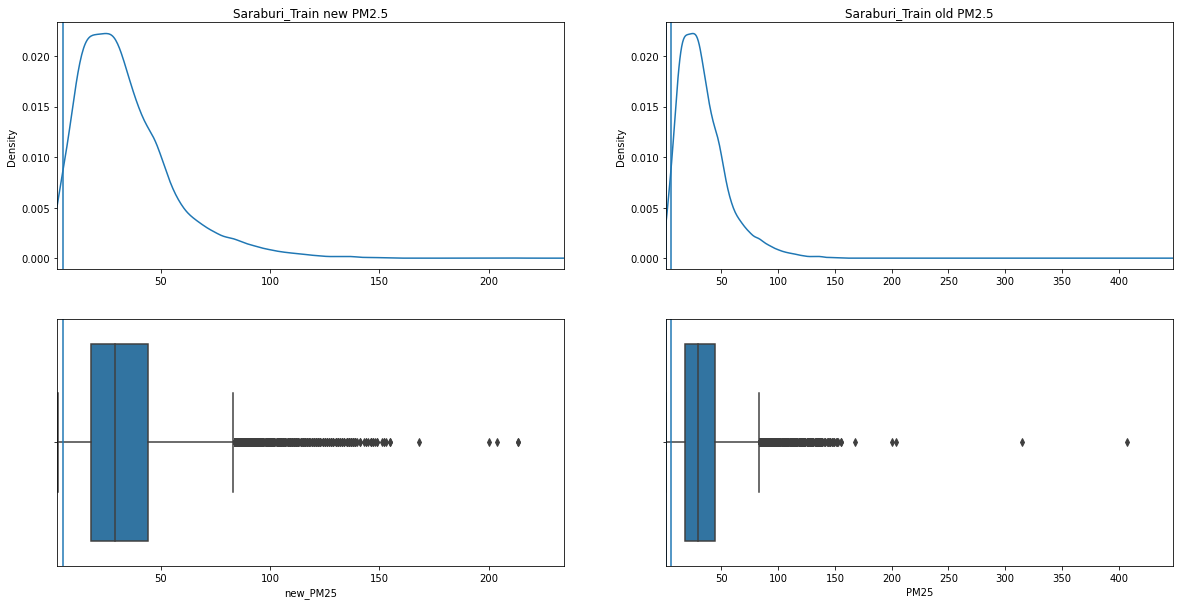

In [34]:
fig = plt.figure(figsize=(20,10))

handle_outliers.plotIQR('SARA', 'new_PM25', 'Saraburi_Train new PM2.5', thresh, fig=fig, subplots=[221, 223], figsize=(15,10))
handle_outliers.plotIQR('SARA', 'PM25', 'Saraburi_Train old PM2.5', thresh, fig=fig, subplots=[222, 224], figsize=(15,10))
plt.show()

## SARIMAX

In [35]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

import pickle

In [38]:
from statsmodels.tsa.stattools import adfuller
import numpy as np
import random
def check_stationarity(ts):
    dftest = adfuller(ts)
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    if (pvalue < 0.05) and (adf < critical_value):
        print('The series is stationary')
    else:
        print('The series is NOT stationary')

In [39]:
seasonal = result.seasonal
check_stationarity(seasonal)

The series is stationary


In [130]:
class SARIMAX_Custom():
    def __init__(self, X_train, order, seasonal_order, exog=None):
        self.X_train = X_train
        self.p, self.d, self.q = order
        self.P, self.D, self.Q, self.S = seasonal_order
        self.X_train_exog = exog
        self.params = {}
        self.params['p'] = [0.01]*self.p
        self.params['d'] = [0.01]*self.d
        self.params['q'] = [0.01]*self.q
        self.params['P'] = [0.01]*self.P if (self.P!=0) else [0]
        self.params['D'] = [0.01]*self.D
        self.params['Q'] = [0.01]*self.Q if (self.Q!=0) else [0]
        self.params['c'] = 0.01
    
    def p_prediction(self, X_train, t):
        start = max(t-self.p, 0)
        X_train_t = np.array(X_train[start:t])[::-1]
        params_p = np.array(self.params['p'][:t-start])[::-1]

        p_pred = X_train_t @ params_p.T

        return p_pred, X_train_t[::-1]

    def q_prediction(self, X_train, Error, t):
        start = max(t-self.q, 0)
        error_t = np.array(Error[start:t])[::-1]
        params_q = np.array(self.params['q'][:t-start])[::-1]

        q_pred = error_t @ params_q.T

        return q_pred, error_t[::-1]

    def P_prediction(self, X_train, t):
        ss_c = t//self.S # season_count
        if (ss_c==0):
            return [0], [0]
        ss_c = min(ss_c, self.P)
        X_train_t = np.array(X_train[t-self.S::-self.S])[:ss_c]
        params_P = np.array(self.params['P'][::-1])[:ss_c]
        
        P_pred = X_train_t @ params_P.T

        return P_pred, X_train_t[::-1]

    def Q_prediction(self, X_train, Error, t):
        ss_c = t//self.S # season_count
        if (ss_c==0 or self.params['Q'].shape[0]==0):
            return [0], [0]
        ss_c = min(ss_c, self.P)
        error_t = np.array(Error[t-self.S::-self.S])[:ss_c]
        params_Q = np.array(self.params['Q'][::-1])[:ss_c]

        Q_pred = error_t @ params_Q.T

        return Q_pred, error_t[::-1]
    
    def update_params(self, x, error_t, lr):
        self.params['p'] += np.pad(x['p'], (0, self.p - len(x['p']))) * error_t * lr
        # self.params['d'] += (x-x['d'])*lr
        self.params['q'] += np.pad(x['q'], (0, self.q - len(x['q']))) * error_t * lr
        self.params['P'] += np.pad(x['P'], (0, self.P - len(x['P']))) * error_t * lr
        # self.params['D'] += (x-x['D'])*lr
        self.params['Q'] += np.pad(x['Q'], (0, self.p - len(x['Q']))) * error_t * lr
        self.params['c'] += (error_t) * lr

     
    def fit(self):
        X_train = self.X_train.copy()
        X_train = X_train.to_numpy()

        Error = [X_train[0]-X_train.mean()]

        lr = 1e-5

        for t in range(1,X_train.shape[0]):
            lr *= 0.999
            pred = {} ; x = {}
            pred['p'], x['p'] = self.p_prediction(X_train, t)
            pred['q'], x['q'] = self.q_prediction(X_train, Error, t)
            pred['P'], x['P'] = self.P_prediction(X_train, t)
            pred['Q'], x['Q'] = self.Q_prediction(X_train, Error, t)

            # y_pred = p_pred.sum() + q_pred.sum() + P_pred.sum() + Q_pred.sum() + self.params['c']
            pred['y'] = (pred['p'] + pred['q'] + pred['P'] + pred['Q'] + self.params['c']).sum()

            error_t = X_train[t] - pred['y']

            print(t, pred['y'], X_train[t], error_t, lr)

            Error.append(error_t)


            self.update_params(x, error_t, lr)
        

        return Error

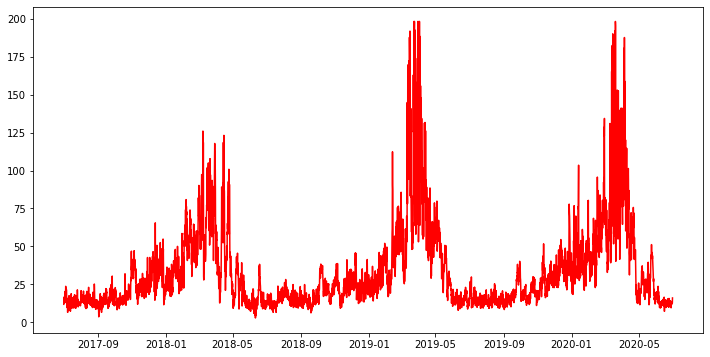

In [211]:
cnx_train_tmp = handle_outliers.dataset['CNX'][['new_PM25', 'Temp', 'WindSpeed', 'WindDir']]
cnx_train_tmp.rename(columns={'new_PM25':'PM25'}, inplace=True)
cnx_train_tmp = cnx_train_tmp.resample('6H').mean()
cnx_test = test_set['CNX']
cnx_test = cnx_test.resample('6H').mean()
cnx_test.shape

plt.figure(figsize=(12,6))
plt.plot(cnx_train_tmp['PM25'],'r')

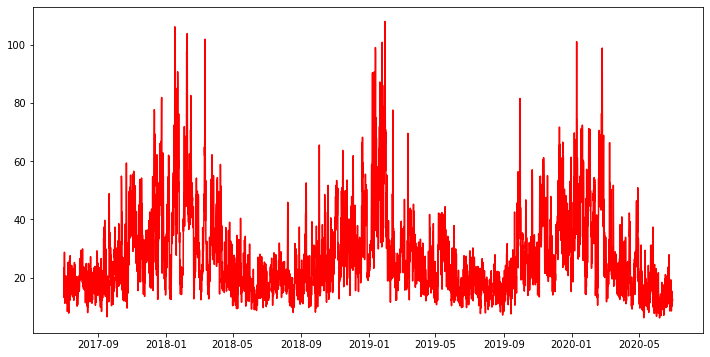

In [213]:
bkk_train_tmp = handle_outliers.dataset['BKK'][['new_PM25', 'Temp', 'WindSpeed', 'WindDir']]
bkk_train_tmp.rename(columns={'new_PM25':'PM25'}, inplace=True)
bkk_train_tmp = bkk_train_tmp.resample('6H').mean()
bkk_test = test_set['BKK']
bkk_test = bkk_test.resample('6H').mean()
bkk_test.shape

plt.figure(figsize=(12,6))
plt.plot(bkk_train_tmp['PM25'],'r')

In [214]:
cnx_train_size, cnx_valid_size = 7*cnx_train_tmp.shape[0]//10, 3*cnx_train_tmp.shape[0]//10

cnx_train, cnx_valid = cnx_train_tmp.iloc[:cnx_train_size], cnx_train_tmp.iloc[cnx_train_size: ]

bkk_train_size, bkk_valid_size = 7*bkk_train_tmp.shape[0]//10, 3*bkk_train_tmp.shape[0]//10

bkk_train, bkk_valid = bkk_train_tmp.iloc[:bkk_train_size], bkk_train_tmp.iloc[bkk_train_size: ],

In [215]:
best_order = (5, 0, 2)
best_seasonal_order = (1, 0, 1, 1461)

exog_columns = ['Temp', 'WindSpeed', 'WindDir']

In [218]:
model_cnx = SARIMAX_Custom(cnx_train['PM25'],
              best_order,
              best_seasonal_order)

model_bkk = SARIMAX_Custom(bkk_train['PM25'],
              best_order,
              best_seasonal_order)

In [224]:
cnx_ERR = model_cnx.fit()
bkk_ERR = model_bkk.fit()

1 -1.4880268894416007 14.333333333333334 15.821360222774935 9.990000000000001e-06
2 8.32986354958273 12.5 4.170136450417271 9.980010000000002e-06
3 9.861644671323809 16.666666666666664 6.805021995342855 9.970029990000002e-06
4 11.882825855309685 14.83333333333333 2.9505074780236455 9.960059960010001e-06
5 14.947947870549886 13.833333333333334 -1.1146145372165517 9.950099900049992e-06
6 13.180430933758725 14.166666666666664 0.9862357329079394 9.940149800149942e-06
7 14.710173850226985 16.666666666666668 1.9564928164396829 9.930209650349793e-06
8 14.8828439388439 12.833333333333334 -2.049510605510566 9.920279440699443e-06
9 12.813716798307006 18.833333333333332 6.019616535026326 9.910359161258744e-06
10 16.628568803854396 20.333333333333332 3.704764529478936 9.900448802097486e-06
11 17.84908577831283 18.333333333333332 0.4842475550205023 9.890548353295388e-06
12 16.188374147856265 14.666666666666666 -1.5217074811895994 9.880657804942094e-06
13 16.808171621854292 21.333333333333332 4.5251

In [225]:
np.sqrt((np.array(cnx_ERR)**2).sum()/365)

26.636881374324112

In [226]:
np.sqrt((np.array(bkk_ERR)**2).sum()/365)

23.59671273970913

In [227]:
model_cnx.params

{'p': array([-0.07835557,  0.43540393,  0.19265458,  0.10787961,  0.2760775 ]),
 'd': [],
 'q': array([0.08373966, 0.31726341]),
 'P': array([0.05616524]),
 'D': [],
 'Q': array([0.00477521, 0.01      , 0.01      , 0.01      , 0.01      ]),
 'c': 0.03643471322020788}

In [228]:
model_bkk.params

{'p': array([0.11079255, 0.23201472, 0.16579886, 0.15827623, 0.28583163]),
 'd': [],
 'q': array([0.08306017, 0.23942968]),
 'P': array([0.02185128]),
 'D': [],
 'Q': array([0.00685883, 0.01      , 0.01      , 0.01      , 0.01      ]),
 'c': 0.026539713541183868}

In [230]:
params = {}
params['CNX'] = model_cnx.params
params['BKK'] = model_bkk.params

In [231]:
X_test = cnx_test['PM25'].copy()
X_test = X_test.to_numpy()

Error = [X_test[0]-cnx_train['PM25'].mean()]

cnx_pred = [0]

for t in range(1,X_test.shape[0]):
    pred = {} ; x = {}
    pred['p'], x['p'] = model_cnx.p_prediction(X_test, t)
    pred['q'], x['q'] = model_cnx.q_prediction(X_test, Error, t)
    pred['P'], x['P'] = model_cnx.P_prediction(X_test, t)
    pred['Q'], x['Q'] = model_cnx.Q_prediction(X_test, Error, t)

    pred['y'] = (pred['p'] + pred['q'] + pred['P'] + pred['Q'] + model_cnx.params['c']).sum()
    
    cnx_pred.append(pred['y'])

    error_t = X_test[t] - pred['y']

    print(t, pred['y'], X_test[t], error_t)

    Error.append(error_t)

1 -2.498986048384333 12.666666666666666 15.165652715051
2 7.827637042038361 11.166666666666666 3.3390296246283047
3 9.107583392232128 15.0 5.892416607767872
4 10.545516396569434 9.5 -1.0455163965694343
5 11.18092017506593 13.333333333333334 2.1524131582674038
6 12.096980480254771 12.0 -0.09698048025477135
7 12.423540441100494 11.666666666666666 -0.7568737744338279
8 9.833376266381343 11.5 1.666623733618657
9 12.308162584781115 12.333333333333334 0.02517074855221857
10 11.257297331260586 10.666666666666666 -0.5906306645939203
11 10.48147222159435 11.833333333333334 1.3518611117389838
12 11.302574539865718 10.5 -0.8025745398657183
13 10.594275650235689 11.833333333333334 1.239057683097645
14 10.719657150467135 12.5 1.7803428495328646
15 11.771934955309987 11.166666666666666 -0.6052682886433214
16 10.349130642217721 9.666666666666666 -0.6824639755510553
17 10.380362336550203 11.0 0.6196376634497973
18 10.922213538868471 10.833333333333334 -0.08888020553513698
19 9.982533360538632 13.16666

In [232]:
X_test = bkk_test['PM25'].copy()
X_test = X_test.to_numpy()

Error = [X_test[0]-bkk_train['PM25'].mean()]

bkk_pred = [0]

for t in range(1,X_test.shape[0]):
    pred = {} ; x = {}
    pred['p'], x['p'] = model_bkk.p_prediction(X_test, t)
    pred['q'], x['q'] = model_bkk.q_prediction(X_test, Error, t)
    pred['P'], x['P'] = model_bkk.P_prediction(X_test, t)
    pred['Q'], x['Q'] = model_bkk.Q_prediction(X_test, Error, t)

    pred['y'] = (pred['p'] + pred['q'] + pred['P'] + pred['Q'] + model_bkk.params['c']).sum()
    
    bkk_pred.append(pred['y'])

    error_t = X_test[t] - pred['y']

    print(t, pred['y'], X_test[t], error_t)

    Error.append(error_t)

1 -0.3723683676549282 12.333333333333334 12.705701700988262
2 5.531268575084925 17.166666666666668 11.635398091581742
3 10.639074055028644 11.833333333333334 1.1942592783046901
4 9.923191410691022 12.666666666666666 2.7434752559756443
5 13.047410988155184 14.166666666666666 1.1192556785114824
6 13.887823939576672 12.5 -1.3878239395766716
7 12.349926206044396 10.5 -1.8499262060443957
8 11.046740075024115 15.166666666666666 4.119926591642551
9 13.619063970138333 13.333333333333334 -0.285730636804999
10 12.722573518823749 11.666666666666666 -1.055906852157083
11 11.530721018860742 13.666666666666666 2.135945647805924
12 13.096029507639882 13.666666666666666 0.5706371590267842
13 13.11825660337608 21.666666666666668 8.548410063290588
14 16.926797318079462 14.666666666666666 -2.260130651412796
15 14.546310689580151 12.0 -2.5463106895801513
16 13.257856130825482 10.0 -3.2578561308254823
17 12.765513415089433 13.166666666666666 0.4011532515772327
18 12.991175845426644 13.833333333333334 0.842

In [234]:
cnx_data = pd.concat((cnx_train, cnx_valid, cnx_test), axis=0)
cnx_test_copy = cnx_test.copy()
cnx_test_copy['PM25'] = cnx_pred
cnx_pred = cnx_test_copy[['PM25']]

mse = mean_squared_error(cnx_test['PM25'], cnx_pred['PM25'])
rmse = np.sqrt(mse)
print('Test on SARIMAX with RMSE: %f' % (rmse, ))

Test on SARIMAX with RMSE: 4.150511


In [235]:
bkk_data = pd.concat((bkk_train, bkk_valid, bkk_test), axis=0)
bkk_test_copy = bkk_test.copy()
bkk_test_copy['PM25'] = bkk_pred
bkk_pred = bkk_test_copy[['PM25']]

mse = mean_squared_error(bkk_test['PM25'], bkk_pred['PM25'])
rmse = np.sqrt(mse)
print('Test on SARIMAX with RMSE: %f' % (rmse, ))

Test on SARIMAX with RMSE: 3.338757


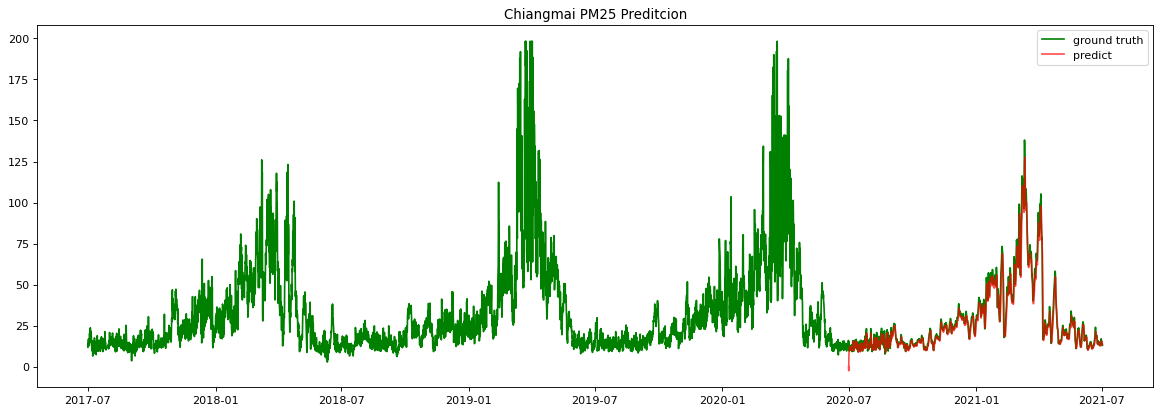

In [240]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(cnx_data['PM25'], color='g',label='ground truth')
plt.plot(cnx_pred['PM25'], alpha=.7, color='r',label='predict')
plt.title("Chiangmai PM25 Preditcion")
plt.legend(loc="upper right")

plt.show()

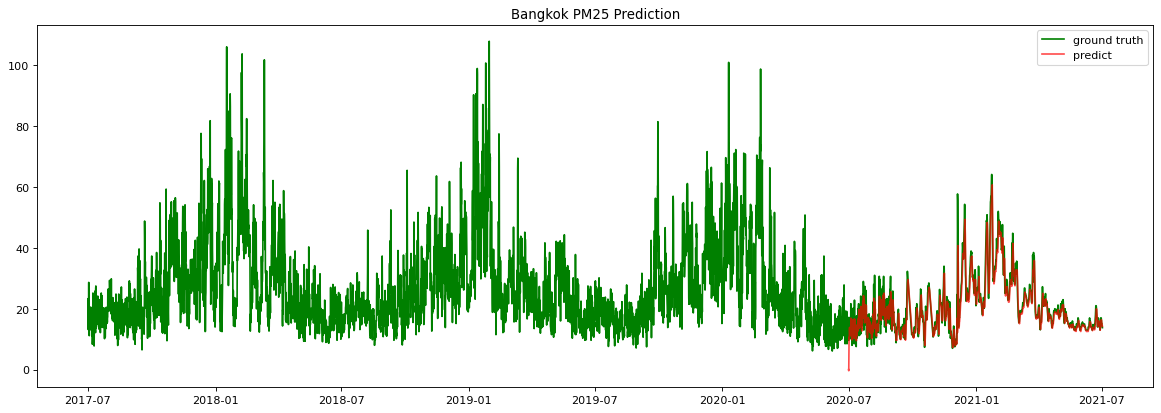

In [241]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(bkk_data['PM25'], color='g',label='ground truth')
plt.plot(bkk_pred['PM25'], alpha=.7, color='r',label='predict')
plt.title("Bangkok PM25 Prediction")
plt.legend(loc="upper right")

plt.show()

In [ ]:
# # Open file - Write binary mode
# model_file = open('mod_cnx[0-1-1_1-1-0-365].model', 'wb')

# # Save Decision tree model
# pickle.dump(mod_cnx, model_file)

# # Close file
# model_file.close()

In [ ]:
# test_exog = pd.concat((cnx_valid[exog_columns], cnx_test[exog_columns]), axis=0)

In [ ]:
# bkk_data = pd.concat((bkk_train, cnx_valid, bkk_test), axis=0)

# Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV